# Imports

In [1]:
import os

os.chdir('..')

# Generation

In [2]:
from NEAT.population import Population

population = Population(1000, 2, 2)

population.new_generation()

0 1 0 1
State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(0,L=0)->Node(4,L=1),W=0.0295,I=1,E=1)]

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

0 0 0 1
State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

0 1 0 1
State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(0,L=0)->Node(3,L=1),W=-0.4479,I=2,E=1)]

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

0 1 0 1
State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), 

In [3]:
for i in range(10):
    population.players[i].print_state()

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(0,L=0)->Node(4,L=1),W=0.0295,I=1,E=1)]

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(0,L=0)->Node(3,L=1),W=-0.4479,I=2,E=1)]

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(2,L=0)->Node(4,L=1),W=-0.0863,I=3,E=1)]

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), 

In [4]:
print(len(population.species))

1


State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(0,L=0)->Node(4,L=1),W=0.0295,I=1,E=1)]



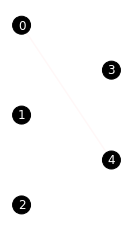

In [5]:
population.players[1].print_state()
population.players[1].draw_state()

In [15]:
species = population.species[0]

print(species.genome_distance(population.players[0]))

0 1 0 1
State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 0, []

State
Neurons: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
Connections: 1, [C(Node(2,L=0)->Node(3,L=1),W=0.8549,I=3,E=1)]

1.0


# Training

In [26]:
def population_info(population):
    return "Players: %d\n" % len(population.players) + \
    "Species: %d\n" % len(population.species) + \
    "Innovations: %d\n" % len(population.innovation_history.innovations) + \
    "Species Threshold: %.4f" % population.species_threshold

def species_info(i):
    fitness = 0
    for player in population.species[i].players:
        fitness += player.fitness
    average_fitness = fitness / len(population.species[i].players)
    return "Species %d - " % i + \
    "Players: %d, " % len(population.species[i].players) + \
    "Average Fitness: %.4f, " % average_fitness + \
    "Max Fitness: %.4f, " % population.species[i].fittest_player.fitness + \
    "Max Fitness Ever: %.4f, " % population.species[i].max_fitness + \
    "Fittest Innovations: %d, " % len(population.species[i].fittest_player.innovation_labels) + \
    "Staleness: %d" % population.species[i].staleness

In [27]:
from NEAT.population import Population
from Circuit_Design.circuit_games import XORGame

population = Population(1000, 2, 2)

for _ in range(10):
    population.new_generation()
    won = XORGame(100).play_game(population.players)
    for i in range(len(population.players)):
        population.players[i].set_fitness(won[i])
    population.update_generation()
    print(population_info(population))
    for i in range(len(population.species)):
        print(species_info(i))

Players: 1000
Species: 1
Innovations: 6
Species Threshold: 2.7000
Species 0 - Players: 501, Average Fitness: 54.0739, Max Fitness: 68.0000, Max Fitness Ever: 68.0000, Fittest Innovations: 1, Staleness: 0
Players: 1000
Species: 12
Innovations: 27
Species Threshold: 3.0000
Species 0 - Players: 381, Average Fitness: 53.7270, Max Fitness: 65.0000, Max Fitness Ever: 68.0000, Fittest Innovations: 0, Staleness: 1
Species 1 - Players: 92, Average Fitness: 53.6739, Max Fitness: 64.0000, Max Fitness Ever: 64.0000, Fittest Innovations: 0, Staleness: 0
Species 2 - Players: 11, Average Fitness: 52.7273, Max Fitness: 60.0000, Max Fitness Ever: 60.0000, Fittest Innovations: 1, Staleness: 0
Species 3 - Players: 3, Average Fitness: 52.0000, Max Fitness: 58.0000, Max Fitness Ever: 58.0000, Fittest Innovations: 2, Staleness: 0
Species 4 - Players: 14, Average Fitness: 52.9286, Max Fitness: 57.0000, Max Fitness Ever: 57.0000, Fittest Innovations: 1, Staleness: 0
Species 5 - Players: 1, Average Fitness: 54

KeyboardInterrupt: 